In [1]:
import pandas as pd
import numpy as np

In [2]:
nursery = pd.read_csv('nursery.csv')
nursery

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [3]:
st_per = pd.read_csv('social_media_engagement1.csv')
st_per

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive
...,...,...,...,...,...,...,...,...,...
95,96,Instagram,carousel,7/12/2023 17:45,36,294,911,Wednesday,positive
96,97,Twitter,video,10/27/2023 23:45,314,108,458,Friday,neutral
97,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive
98,99,Instagram,poll,12/29/2023 12:15,5000,500,204,Friday,positive


# Feature selection technique

In [4]:
st_per['platform']

0      Facebook
1      Facebook
2     Instagram
3       Twitter
4       Twitter
        ...    
95    Instagram
96      Twitter
97      Twitter
98    Instagram
99    Instagram
Name: platform, Length: 100, dtype: object

In [5]:
st_per['likes']

0     2121
1     3660
2     4955
3     1183
4     3499
      ... 
95      36
96     314
97     229
98    5000
99    4483
Name: likes, Length: 100, dtype: int64

In [6]:
st_per[['platform','post_type',	'post_time']]

,platform,post_type,post_time
0,Facebook,image,8/17/2023 14:45
1,Facebook,carousel,5/14/2023 0:45
2,Instagram,poll,2/21/2023 16:15
3,Twitter,image,11/16/2023 0:45
4,Twitter,video,5/23/2023 0:30
...,...,...,...
95,Instagram,carousel,7/12/2023 17:45
96,Twitter,video,10/27/2023 23:45
97,Twitter,text,8/5/2023 8:45
98,Instagram,poll,12/29/2023 12:15


In [ ]:
new_df = st_per[['platform','post_type','post_time']]

In [8]:
new_df

,platform,post_type,post_time
0,Facebook,image,8/17/2023 14:45
1,Facebook,carousel,5/14/2023 0:45
2,Instagram,poll,2/21/2023 16:15
3,Twitter,image,11/16/2023 0:45
4,Twitter,video,5/23/2023 0:30
...,...,...,...
95,Instagram,carousel,7/12/2023 17:45
96,Twitter,video,10/27/2023 23:45
97,Twitter,text,8/5/2023 8:45
98,Instagram,poll,12/29/2023 12:15


In [9]:
# column

st_per.columns

Index(['post_id', 'platform', 'post_type', 'post_time', 'likes', 'comments',
       'shares', 'post_day', 'sentiment_score'],
      dtype='object')

In [11]:
st_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [12]:
# select_dtype

st_per.select_dtypes(include=int)

,post_id,likes,comments,shares
0,1,2121,474,628
1,2,3660,432,694
2,3,4955,408,688
3,4,1183,90,187
4,5,3499,247,286
...,...,...,...,...
95,96,36,294,911
96,97,314,108,458
97,98,229,179,38
98,99,5000,500,204


In [13]:
st_per.select_dtypes(include=float)

""
0
1
2
3
4
...
95
96
97
98


In [14]:
st_per.select_dtypes(include='number')

,post_id,likes,comments,shares
0,1,2121,474,628
1,2,3660,432,694
2,3,4955,408,688
3,4,1183,90,187
4,5,3499,247,286
...,...,...,...,...
95,96,36,294,911
96,97,314,108,458
97,98,229,179,38
98,99,5000,500,204


In [15]:
st_per.select_dtypes(include='object')

,platform,post_type,post_time,post_day,sentiment_score
0,Facebook,image,8/17/2023 14:45,Thursday,positive
1,Facebook,carousel,5/14/2023 0:45,Sunday,neutral
2,Instagram,poll,2/21/2023 16:15,Tuesday,negative
3,Twitter,image,11/16/2023 0:45,Thursday,negative
4,Twitter,video,5/23/2023 0:30,Tuesday,positive
...,...,...,...,...,...
95,Instagram,carousel,7/12/2023 17:45,Wednesday,positive
96,Twitter,video,10/27/2023 23:45,Friday,neutral
97,Twitter,text,8/5/2023 8:45,Saturday,positive
98,Instagram,poll,12/29/2023 12:15,Friday,positive


In [23]:
st_per.select_dtypes(include = 'number')

,post_id,likes,comments,shares
0,1,2121,474,628
1,2,3660,432,694
2,3,4955,408,688
3,4,1183,90,187
4,5,3499,247,286
...,...,...,...,...
95,96,36,294,911
96,97,314,108,458
97,98,229,179,38
98,99,5000,500,204


In [24]:
st_per['comments'][97]

np.int64(179)

In [22]:
st_per['comments'][6]

np.int64(30)

In [25]:
st_per['shares'][:5]

0    628
1    694
2    688
3    187
4    286
Name: shares, dtype: int64

In [26]:
st_per['shares'][40:50]

40    461
41    730
42     85
43    177
44    118
45    427
46    993
47     16
48    298
49    127
Name: shares, dtype: int64

In [28]:
st_per[['shares','comments']][40:51]

,shares,comments
40,461,176
41,730,252
42,85,97
43,177,50
44,118,132
45,427,380
46,993,44
47,16,232
48,298,169
49,127,206


In [29]:
new_df

,platform,post_type,post_time
0,Facebook,image,8/17/2023 14:45
1,Facebook,carousel,5/14/2023 0:45
2,Instagram,poll,2/21/2023 16:15
3,Twitter,image,11/16/2023 0:45
4,Twitter,video,5/23/2023 0:30
...,...,...,...
95,Instagram,carousel,7/12/2023 17:45
96,Twitter,video,10/27/2023 23:45
97,Twitter,text,8/5/2023 8:45
98,Instagram,poll,12/29/2023 12:15


In [30]:
new_df['post_type'][2]

'poll'

In [31]:
new_df['post_type'][2] = "video"

C:\Users\GrowTech\AppData\Local\Temp\ipykernel_14168\3977522250.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_df['post_type'][2] = "video"
C:\Users\GrowTech\AppData\Local\Temp\ipykernel_14168\3977522250.py:1: SettingWithCopyWarning

In [32]:
new_df

,platform,post_type,post_time
0,Facebook,image,8/17/2023 14:45
1,Facebook,carousel,5/14/2023 0:45
2,Instagram,video,2/21/2023 16:15
3,Twitter,image,11/16/2023 0:45
4,Twitter,video,5/23/2023 0:30
...,...,...,...
95,Instagram,carousel,7/12/2023 17:45
96,Twitter,video,10/27/2023 23:45
97,Twitter,text,8/5/2023 8:45
98,Instagram,poll,12/29/2023 12:15


In [33]:
st_per

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive
...,...,...,...,...,...,...,...,...,...
95,96,Instagram,carousel,7/12/2023 17:45,36,294,911,Wednesday,positive
96,97,Twitter,video,10/27/2023 23:45,314,108,458,Friday,neutral
97,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive
98,99,Instagram,poll,12/29/2023 12:15,5000,500,204,Friday,positive


In [40]:
st_per.loc[[0,1]]

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral


In [44]:
st_per.loc[[3,6,7,5]]

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
6,7,Instagram,image,2/26/2023 11:45,1982,30,906,Sunday,positive
7,8,Instagram,text,10/28/2023 19:30,1274,45,216,Saturday,neutral
5,6,Instagram,carousel,5/5/2023 20:00,256,186,211,Friday,neutral


In [47]:
st_per.loc[[3,6,7,5]]

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
6,7,Instagram,image,2/26/2023 11:45,1982,30,906,Sunday,positive
7,8,Instagram,text,10/28/2023 19:30,1274,45,216,Saturday,neutral
5,6,Instagram,carousel,5/5/2023 20:00,256,186,211,Friday,neutral


In [48]:
st_per.loc[(st_per['comments'])>100]

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive
5,6,Instagram,carousel,5/5/2023 20:00,256,186,211,Friday,neutral
...,...,...,...,...,...,...,...,...,...
95,96,Instagram,carousel,7/12/2023 17:45,36,294,911,Wednesday,positive
96,97,Twitter,video,10/27/2023 23:45,314,108,458,Friday,neutral
97,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive
98,99,Instagram,poll,12/29/2023 12:15,5000,500,204,Friday,positive


In [50]:
st_per.loc[(st_per['likes'])>=5000]

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
23,24,Instagram,carousel,1/1/2023 20:00,5000,80,399,Sunday,positive
35,36,Facebook,video,4/8/2023 19:15,5000,500,43,Saturday,positive
38,39,Facebook,video,1/1/2023 6:00,5000,430,980,Sunday,neutral
47,48,Facebook,video,3/22/2023 3:15,5000,232,16,Wednesday,negative
73,74,Instagram,video,4/14/2023 10:30,5000,454,744,Friday,positive
74,75,Facebook,video,7/26/2023 20:15,5000,500,404,Wednesday,positive
82,83,Instagram,video,12/6/2023 4:00,5000,173,792,Wednesday,negative
98,99,Instagram,poll,12/29/2023 12:15,5000,500,204,Friday,positive


In [58]:
st_per[st_per['platform']=='Instagram']

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
5,6,Instagram,carousel,5/5/2023 20:00,256,186,211,Friday,neutral
6,7,Instagram,image,2/26/2023 11:45,1982,30,906,Sunday,positive
7,8,Instagram,text,10/28/2023 19:30,1274,45,216,Saturday,neutral
16,17,Instagram,poll,7/5/2023 5:15,2872,10,736,Wednesday,positive
23,24,Instagram,carousel,1/1/2023 20:00,5000,80,399,Sunday,positive
26,27,Instagram,text,10/6/2023 10:00,3161,162,137,Friday,positive
31,32,Instagram,image,7/1/2023 14:45,4665,202,183,Saturday,positive
34,35,Instagram,image,6/6/2023 19:30,1309,201,852,Tuesday,negative
39,40,Instagram,carousel,8/4/2023 12:45,447,333,845,Friday,negative


In [68]:
st_per.loc[(st_per['likes']>=5000) 
           & (st_per['platform']=='Instagram') 
           & (st_per['post_type']=="video")]

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
73,74,Instagram,video,4/14/2023 10:30,5000,454,744,Friday,positive
82,83,Instagram,video,12/6/2023 4:00,5000,173,792,Wednesday,negative


In [64]:
st_per.loc[(st_per['post_day']=='Thursday')]

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
9,10,Twitter,carousel,5/11/2023 11:00,1878,225,438,Thursday,neutral
11,12,Twitter,video,6/15/2023 3:15,304,42,89,Thursday,positive
19,20,Facebook,image,2/2/2023 16:00,455,86,79,Thursday,positive
25,26,Facebook,carousel,10/5/2023 6:30,1992,70,515,Thursday,negative
33,34,Twitter,poll,2/9/2023 15:30,2253,162,28,Thursday,positive
36,37,Facebook,video,5/11/2023 0:30,4245,59,83,Thursday,neutral
41,42,Instagram,video,11/23/2023 2:00,4929,252,730,Thursday,negative
43,44,Instagram,text,7/6/2023 8:00,3259,50,177,Thursday,negative


In [ ]:
st_per.loc[(st_per['post_day']=='Thursday') 
           & (st_per['sentiment_score']=='positive')]

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
11,12,Twitter,video,6/15/2023 3:15,304,42,89,Thursday,positive
19,20,Facebook,image,2/2/2023 16:00,455,86,79,Thursday,positive
33,34,Twitter,poll,2/9/2023 15:30,2253,162,28,Thursday,positive
77,78,Instagram,poll,1/19/2023 7:15,2990,30,365,Thursday,positive
91,92,Facebook,video,2/23/2023 17:15,1857,216,344,Thursday,positive


In [67]:
st_per.loc[(st_per['post_day']=='Thursday') 
           & (st_per['sentiment_score']=='positive') 
           & (st_per['post_type']=='video')]

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
11,12,Twitter,video,6/15/2023 3:15,304,42,89,Thursday,positive
91,92,Facebook,video,2/23/2023 17:15,1857,216,344,Thursday,positive


In [69]:
st_per.iloc[:]

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive
...,...,...,...,...,...,...,...,...,...
95,96,Instagram,carousel,7/12/2023 17:45,36,294,911,Wednesday,positive
96,97,Twitter,video,10/27/2023 23:45,314,108,458,Friday,neutral
97,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive
98,99,Instagram,poll,12/29/2023 12:15,5000,500,204,Friday,positive


In [70]:
st_per.iloc[:5]

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


In [71]:
st_per.iloc[:5,:]

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


In [75]:
st_per.iloc[:5,:3] # 0,1

,post_id,platform,post_type
0,1,Facebook,image
1,2,Facebook,carousel
2,3,Instagram,poll
3,4,Twitter,image
4,5,Twitter,video


In [76]:
st_per.iloc[20:60,:]

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
20,21,Twitter,poll,5/2/2023 6:15,559,136,55,Tuesday,neutral
21,22,Twitter,carousel,1/30/2023 13:30,1961,44,439,Monday,positive
22,23,Twitter,text,10/2/2023 12:15,332,109,348,Monday,positive
23,24,Instagram,carousel,1/1/2023 20:00,5000,80,399,Sunday,positive
24,25,Twitter,poll,5/17/2023 0:15,898,130,480,Wednesday,positive
25,26,Facebook,carousel,10/5/2023 6:30,1992,70,515,Thursday,negative
26,27,Instagram,text,10/6/2023 10:00,3161,162,137,Friday,positive
27,28,Facebook,poll,3/1/2023 8:00,2083,500,388,Wednesday,neutral
28,29,Facebook,image,1/7/2023 10:30,548,153,731,Saturday,negative
29,30,Facebook,carousel,2/3/2023 0:30,4594,216,739,Friday,positive


In [77]:
st_per.iloc[20:60,4:]

,likes,comments,shares,post_day,sentiment_score
20,559,136,55,Tuesday,neutral
21,1961,44,439,Monday,positive
22,332,109,348,Monday,positive
23,5000,80,399,Sunday,positive
24,898,130,480,Wednesday,positive
25,1992,70,515,Thursday,negative
26,3161,162,137,Friday,positive
27,2083,500,388,Wednesday,neutral
28,548,153,731,Saturday,negative
29,4594,216,739,Friday,positive


In [78]:
st_per.iloc[20:60,4:7]

,likes,comments,shares
20,559,136,55
21,1961,44,439
22,332,109,348
23,5000,80,399
24,898,130,480
25,1992,70,515
26,3161,162,137
27,2083,500,388
28,548,153,731
29,4594,216,739


In [79]:
st_per.iloc[:,4:7]

,likes,comments,shares
0,2121,474,628
1,3660,432,694
2,4955,408,688
3,1183,90,187
4,3499,247,286
...,...,...,...
95,36,294,911
96,314,108,458
97,229,179,38
98,5000,500,204


In [80]:
st_per.iloc[20:60,:]

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
20,21,Twitter,poll,5/2/2023 6:15,559,136,55,Tuesday,neutral
21,22,Twitter,carousel,1/30/2023 13:30,1961,44,439,Monday,positive
22,23,Twitter,text,10/2/2023 12:15,332,109,348,Monday,positive
23,24,Instagram,carousel,1/1/2023 20:00,5000,80,399,Sunday,positive
24,25,Twitter,poll,5/17/2023 0:15,898,130,480,Wednesday,positive
25,26,Facebook,carousel,10/5/2023 6:30,1992,70,515,Thursday,negative
26,27,Instagram,text,10/6/2023 10:00,3161,162,137,Friday,positive
27,28,Facebook,poll,3/1/2023 8:00,2083,500,388,Wednesday,neutral
28,29,Facebook,image,1/7/2023 10:30,548,153,731,Saturday,negative
29,30,Facebook,carousel,2/3/2023 0:30,4594,216,739,Friday,positive


In [81]:
st_per.select_dtypes(include='number')

,post_id,likes,comments,shares
0,1,2121,474,628
1,2,3660,432,694
2,3,4955,408,688
3,4,1183,90,187
4,5,3499,247,286
...,...,...,...,...
95,96,36,294,911
96,97,314,108,458
97,98,229,179,38
98,99,5000,500,204


In [82]:
st_per.select_dtypes(include='number').columns

Index(['post_id', 'likes', 'comments', 'shares'], dtype='object')

In [86]:
st_per.select_dtypes(include='object').columns

Index(['platform', 'post_type', 'post_time', 'post_day', 'sentiment_score'], dtype='object')

In [87]:
# sort values

st_per.sort_values('shares')

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
47,48,Facebook,video,3/22/2023 3:15,5000,232,16,Wednesday,negative
15,16,Twitter,image,2/10/2023 13:00,2348,154,18,Friday,neutral
99,100,Instagram,image,6/6/2023 21:00,4483,357,25,Tuesday,neutral
33,34,Twitter,poll,2/9/2023 15:30,2253,162,28,Thursday,positive
97,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive
...,...,...,...,...,...,...,...,...,...
59,60,Instagram,carousel,5/19/2023 4:30,4763,332,956,Friday,positive
69,70,Facebook,text,6/12/2023 9:30,3094,86,965,Monday,negative
30,31,Facebook,poll,9/10/2023 13:45,4795,449,978,Sunday,negative
38,39,Facebook,video,1/1/2023 6:00,5000,430,980,Sunday,neutral


In [88]:
st_per.sort_values('shares',ascending=False)

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
46,47,Facebook,poll,8/8/2023 17:45,4726,44,993,Tuesday,negative
38,39,Facebook,video,1/1/2023 6:00,5000,430,980,Sunday,neutral
30,31,Facebook,poll,9/10/2023 13:45,4795,449,978,Sunday,negative
69,70,Facebook,text,6/12/2023 9:30,3094,86,965,Monday,negative
59,60,Instagram,carousel,5/19/2023 4:30,4763,332,956,Friday,positive
...,...,...,...,...,...,...,...,...,...
97,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive
33,34,Twitter,poll,2/9/2023 15:30,2253,162,28,Thursday,positive
99,100,Instagram,image,6/6/2023 21:00,4483,357,25,Tuesday,neutral
15,16,Twitter,image,2/10/2023 13:00,2348,154,18,Friday,neutral


In [89]:
st_per.sort_values('shares',ascending=False,ignore_index=True)

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,47,Facebook,poll,8/8/2023 17:45,4726,44,993,Tuesday,negative
1,39,Facebook,video,1/1/2023 6:00,5000,430,980,Sunday,neutral
2,31,Facebook,poll,9/10/2023 13:45,4795,449,978,Sunday,negative
3,70,Facebook,text,6/12/2023 9:30,3094,86,965,Monday,negative
4,60,Instagram,carousel,5/19/2023 4:30,4763,332,956,Friday,positive
...,...,...,...,...,...,...,...,...,...
95,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive
96,34,Twitter,poll,2/9/2023 15:30,2253,162,28,Thursday,positive
97,100,Instagram,image,6/6/2023 21:00,4483,357,25,Tuesday,neutral
98,16,Twitter,image,2/10/2023 13:00,2348,154,18,Friday,neutral


In [ ]:
st_per.sort_index()

,id,sm_platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive
...,...,...,...,...,...,...,...,...,...
95,96,Instagram,carousel,7/12/2023 17:45,36,294,911,Wednesday,positive
96,97,Twitter,video,10/27/2023 23:45,314,108,458,Friday,neutral
97,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive
98,99,Instagram,poll,12/29/2023 12:15,5000,500,204,Friday,positive


In [96]:
st_per.sort_index(ascending=False)

,id,sm_platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
99,100,Instagram,image,6/6/2023 21:00,4483,357,25,Tuesday,neutral
98,99,Instagram,poll,12/29/2023 12:15,5000,500,204,Friday,positive
97,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive
96,97,Twitter,video,10/27/2023 23:45,314,108,458,Friday,neutral
95,96,Instagram,carousel,7/12/2023 17:45,36,294,911,Wednesday,positive
...,...,...,...,...,...,...,...,...,...
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral


In [ ]:
# rename

st_per.rename(columns={"platform":"sm_platform"},)


,post_id,sm_platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive
...,...,...,...,...,...,...,...,...,...
95,96,Instagram,carousel,7/12/2023 17:45,36,294,911,Wednesday,positive
96,97,Twitter,video,10/27/2023 23:45,314,108,458,Friday,neutral
97,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive
98,99,Instagram,poll,12/29/2023 12:15,5000,500,204,Friday,positive


In [92]:
st_per

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive
...,...,...,...,...,...,...,...,...,...
95,96,Instagram,carousel,7/12/2023 17:45,36,294,911,Wednesday,positive
96,97,Twitter,video,10/27/2023 23:45,314,108,458,Friday,neutral
97,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive
98,99,Instagram,poll,12/29/2023 12:15,5000,500,204,Friday,positive


In [93]:
st_per.rename(columns={"platform":"sm_platform",
                       "post_id":"id"},inplace=True)

In [94]:
st_per.head()

,id,sm_platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
st_per['post_day'].value_counts()

post_day
Wednesday    18
Friday       16
Thursday     16
Tuesday      15
Sunday       14
Monday       11
Saturday     10
Name: count, dtype: int64

In [117]:
st_per['post_day'].value_counts().index

Index(['Wednesday', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Monday',
       'Saturday'],
      dtype='object', name='post_day')

In [118]:
st_per['post_day'].value_counts().values

array([18, 16, 16, 15, 14, 11, 10])

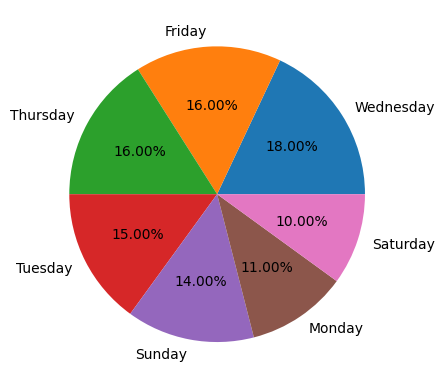

In [ ]:
plt.pie(labels = st_per['post_day'].value_counts().index,
        x = st_per['post_day'].value_counts().values,
        autopct="%0.2f%%",)
plt.show()